# Urban Sound Classification Using Machine Learning
### In this project we will demonstrate how to classify different sounds using Machine Learning... 
### The sounds in this project are slightly different than most of the ones people are used to such as speech or music based audio. In this case we will be working with sounds in an urban environment such as car horns, street music, dogs barking, and more...

In our Dataset we have 10 different classes of sounds:
* air_conditioner,
* car_horn,
* children_playing,
* dog_bark,
* drilling,
* engine_idling,
* gun_shot,
* jackhammer,
* siren,
* and streetmusic...

The dataset and more information can be obtained here:
https://urbansounddataset.weebly.com/urbansound8k.html

In [37]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import wave

from helpers.wavfilehelper import WavFileHelper

ModuleNotFoundError: No module named 'helpers.wavfilehelper'

In [2]:
#Get some of the Data so we can explore it and create the Audio wave file object
train_data = pd.read_csv('train/train.csv')

In [20]:
#Visualization of each of the soundwaves to see how they differ in visually:
#creating a dict with the title and the id of the wavfile
sw_dict = {'Air Conditioner': 22, 'Car Horn': 48, 'Children Playing': 6, 'Dog Bark': 4, 'Drilling': 2, 'Engine Idling': 17, 'Gun Shot': 12, 'Jackhammer': 33, 'Siren': 0, 'Street Music': 1}

In [35]:
def plot_wave(wavefile, title, bitrate):
    '''
    wavefile = .wav file name
    title = plot title
    bits = dtype of the wave, for example 'int16'
    '''
    #first we must open the .wav file
    train_audio_file = wave.open(wavefile)
    #Read in the frames as bytes
    signal = train_audio_file.readframes(-1)
    #Then we convert the bytes into integers
    soundwave = np.frombuffer(signal, dtype=bits)
    #Get the framerate
    framerate = train_audio_file.getframerate()
    #create the timestamps for our x axis
    time_sw = np.linspace(start = 0, stop = len(soundwave) / framerate, num = len(soundwave))
    #plot labels
    plt.title(title)

    plt.xlabel('Time (seconds)')
    plt.ylabel('Amplitude')

    #plot the values
    plt.plot(time_sw, soundwave, label='Soundwave')
    plt.show()

Air Conditioner


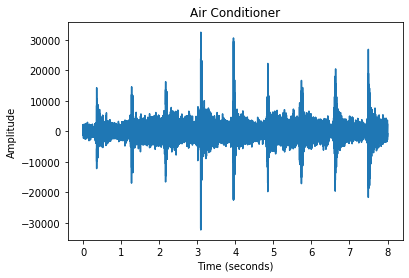

Car Horn


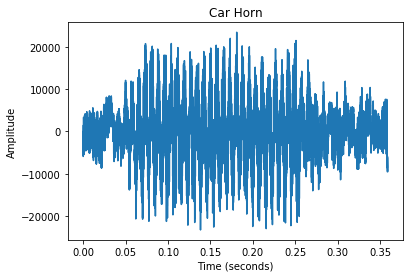

Children Playing


Error: unknown format: 65534

In [34]:
for key, value in sw_dict.items():
    print(key)
    wavefile_name = 'train/Train/' + str(value) + '.wav'
    plot_wave(wavefile_name, key)

In [3]:
train_audio_file_0 = wave.open('train/Train/0.wav', 'r')
train_audio_file_1 = wave.open('train/Train/1.wav', 'r')
train_audio_file_2 = wave.open('train/Train/2.wav', 'r')
train_audio_file_3 = wave.open('train/Train/3.wav', 'r')

train_audio_file_0

In [4]:
#Exploratory Data Analysis
train_data.head()

,ID,Class
0,0,siren
1,1,street_music
2,2,drilling
3,3,siren
4,4,dog_bark


In [5]:
train_data.describe()

,ID
count,5435.000000
mean,4367.264949
std,2535.866061
min,0.000000
25%,2176.500000
50%,4369.000000
75%,6573.500000
max,8729.000000


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5435 entries, 0 to 5434
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      5435 non-null   int64 
 1   Class   5435 non-null   object
dtypes: int64(1), object(1)
memory usage: 85.0+ KB


In [7]:
train_data['Class'].value_counts()

jackhammer          668
engine_idling       624
siren               607
air_conditioner     600
children_playing    600
drilling            600
dog_bark            600
street_music        600
car_horn            306
gun_shot            230
Name: Class, dtype: int64

In [8]:
#Read the frames from the wave object as bytes
signal_0 = train_audio_file_0.readframes(-1)
signal_1 = train_audio_file_1.readframes(-1)
signal_2 = train_audio_file_2.readframes(-1)
signal_3 = train_audio_file_3.readframes(-1)

#convert the bytes into integer values
soundwave_0 = np.frombuffer(signal_0, dtype='int16')
soundwave_1 = np.frombuffer(signal_1, dtype='int16')
soundwave_2 = np.frombuffer(signal_2, dtype='int16')
soundwave_3 = np.frombuffer(signal_3, dtype='int16')

In [9]:
#Viewing some of the sound wave values to ensure we converted them to ints properly
print(soundwave_0[:20])
print(soundwave_1[:20])
print(soundwave_2[:20])
print(soundwave_3[:20])

[-1093   110 -1262  -119 -1476  -281 -1509  -377 -1325  -352 -1001  -228
  -355     3   689   526  1686  1363  2217  2192]
[-3939 -4940 -4686 -2676   543  3134  3754  2801  1430   688  1295  3112
  5523  8147 10308 11214 11156 10751  9755  8058]
[  0 -65   0 -63  -5 -69 -12 -74  -8 -74  -2 -66  -2 -69  -9 -72 -11 -72
 -11 -69]
[   729   1087    762   2638     62   3106  -1730   2463  -4538   1112
  -8109   -394 -12093  -1602 -15841  -2286 -18466  -2434 -19383  -2114]


In [10]:
#Get the soundwave framerate
framerate_0 = train_audio_file_0.getframerate()
framerate_1 = train_audio_file_1.getframerate()
framerate_2 = train_audio_file_2.getframerate()
framerate_3 = train_audio_file_3.getframerate()

print(framerate_0)
print(framerate_1)
print(framerate_2)
print(framerate_3)

44100
48000
44100
44100


In [18]:
#Find the soundwave timestamps
time_sw_0 = np.linspace(start = 0, stop = len(soundwave_0) / framerate_0, num = len(soundwave_0))
time_sw_2 = np.linspace(start = 0, stop = len(soundwave_2) / framerate_2, num = len(soundwave_2))
time_sw_3 = np.linspace(start = 0, stop = len(soundwave_3) / framerate_3, num = len(soundwave_3))

#Printing the first 10 timestamps
print(time_sw_0[:10])
print(time_sw_2[:10])
print(time_sw_3[:10])

[0.00000000e+00 2.26758012e-05 4.53516025e-05 6.80274037e-05
 9.07032049e-05 1.13379006e-04 1.36054807e-04 1.58730609e-04
 1.81406410e-04 2.04082211e-04]
[0.00000000e+00 2.26758012e-05 4.53516025e-05 6.80274037e-05
 9.07032049e-05 1.13379006e-04 1.36054807e-04 1.58730609e-04
 1.81406410e-04 2.04082211e-04]
[0.00000000e+00 2.26758012e-05 4.53516025e-05 6.80274037e-05
 9.07032049e-05 1.13379006e-04 1.36054807e-04 1.58730609e-04
 1.81406410e-04 2.04082211e-04]


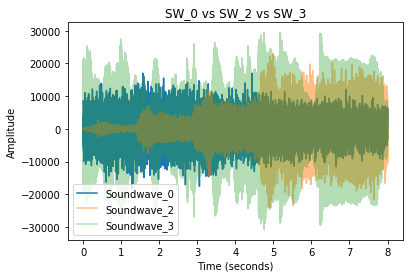

In [27]:
%matplotlib inline
#plot labels
plt.title('SW_0 vs SW_2 vs SW_3')

plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')

#plot the values
plt.plot(time_sw_0, soundwave_0, label='Soundwave_0')
plt.plot(time_sw_2, soundwave_2, label='Soundwave_2', alpha=0.5)
plt.plot(time_sw_3, soundwave_3, label='Soundwave_3', alpha=0.35)

plt.legend()
plt.show()